In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv("/Users/yashv/Downloads/Car details v3.csv")
raw_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
data_1 = raw_data.copy()

In [4]:
data_1['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [5]:
data_1['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [6]:
data_1['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [7]:
data_1['transmission'] = data_1['transmission'].map({'Manual':0,'Automatic':1})

In [8]:
data_1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,0,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,0,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,0,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,0,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,0,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [9]:
def remove_kmpl(x):
    if isinstance(x, str):
        new_values = x.split(' ')
        if len(new_values)>=2:
            return float(new_values[0])
    else:
        return x

In [10]:
data_1['mileage'] = data_1['mileage'].apply(remove_kmpl)

In [11]:
data_1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,0,First Owner,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,0,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,0,Third Owner,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,0,First Owner,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,0,First Owner,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [12]:
def remove_cc(x):
    if isinstance(x, str):
        new_values = x.split(' ')
        if len(new_values)>=2:
            return float(new_values[0])
    else:
        return x

In [13]:
data_2 = data_1.copy()

In [14]:
data_2['engine'] = data_2['engine'].apply(remove_cc)

In [15]:
data_2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,0,First Owner,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,0,Second Owner,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,0,Third Owner,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,0,First Owner,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,0,First Owner,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [16]:
data_2['max_power'] = data_2['max_power'].astype(str).str.replace('bhp', '', regex = False)

In [17]:
data_2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,0,First Owner,23.40,1248.0,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,0,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,0,Third Owner,17.70,1497.0,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,0,First Owner,23.00,1396.0,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,0,First Owner,16.10,1298.0,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [18]:
data_3 = data_2.copy()

In [19]:
data_3 = data_3.drop(['torque'], axis=1)

In [20]:
data_3.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128.000000,8128,7907.000000,7907.000000,8128,7907.000000
unique,2058,NaN,NaN,NaN,4,3,NaN,5,NaN,NaN,323,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,NaN,First Owner,NaN,NaN,74,NaN
freq,129,NaN,NaN,NaN,4402,6766,NaN,5289,NaN,NaN,377,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,0.129183,NaN,19.418783,1458.625016,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,0.335423,NaN,4.037145,503.916303,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,0.000000,NaN,0.000000,624.000000,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,0.000000,NaN,16.780000,1197.000000,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,0.000000,NaN,19.300000,1248.000000,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,0.000000,NaN,22.320000,1582.000000,NaN,5.000000


In [21]:
data_3 = data_3.dropna(subset=['seats'])

In [22]:
data_3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,0,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,0,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,0,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,0,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,0,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,0,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,0,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,0,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,0,First Owner,23.57,1396.0,70,5.0


In [23]:
data_3.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [24]:
data_3['age'] = data_3.year.apply(lambda x:2023-x)

In [25]:
data_4 = data_3.drop("year", axis = 1)

In [26]:
data_4.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,0,First Owner,23.40,1248.0,74,5.0,9
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,0,Second Owner,21.14,1498.0,103.52,5.0,9
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,0,Third Owner,17.70,1497.0,78,5.0,17
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,0,First Owner,23.00,1396.0,90,5.0,13
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,0,First Owner,16.10,1298.0,88.2,5.0,16


In [27]:
def inttofloat(x):
    return float(x)
data_4.selling_price = data_4.selling_price.apply(lambda x: inttofloat(x))

In [28]:
data_4['max_power']  = pd.to_numeric(data_4['max_power'], errors = 'coerce')

In [29]:
data_4['max_power'] = data_4['max_power'].astype(float)

In [30]:
fuel_dummies = pd.get_dummies(data_4['fuel'], drop_first = True)

In [31]:
data_4  = pd.concat([data_4, fuel_dummies], axis=1)
data_4

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,Diesel,LPG,Petrol
0,Maruti Swift Dzire VDI,450000.0,145500,Diesel,Individual,0,First Owner,23.40,1248.0,74.00,5.0,9,True,False,False
1,Skoda Rapid 1.5 TDI Ambition,370000.0,120000,Diesel,Individual,0,Second Owner,21.14,1498.0,103.52,5.0,9,True,False,False
2,Honda City 2017-2020 EXi,158000.0,140000,Petrol,Individual,0,Third Owner,17.70,1497.0,78.00,5.0,17,False,False,True
3,Hyundai i20 Sportz Diesel,225000.0,127000,Diesel,Individual,0,First Owner,23.00,1396.0,90.00,5.0,13,True,False,False
4,Maruti Swift VXI BSIII,130000.0,120000,Petrol,Individual,0,First Owner,16.10,1298.0,88.20,5.0,16,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,320000.0,110000,Petrol,Individual,0,First Owner,18.50,1197.0,82.85,5.0,10,False,False,True
8124,Hyundai Verna CRDi SX,135000.0,119000,Diesel,Individual,0,Fourth & Above Owner,16.80,1493.0,110.00,5.0,16,True,False,False
8125,Maruti Swift Dzire ZDi,382000.0,120000,Diesel,Individual,0,First Owner,19.30,1248.0,73.90,5.0,14,True,False,False
8126,Tata Indigo CR4,290000.0,25000,Diesel,Individual,0,First Owner,23.57,1396.0,70.00,5.0,10,True,False,False


In [32]:
data_4 = data_4.drop('fuel',axis=1)

In [33]:
seller_dummies = pd.get_dummies(data_4['seller_type'], drop_first= True)

In [34]:
owner_dummies = pd.get_dummies(data_4['owner'], drop_first=True)

In [35]:
data_4 = pd.concat([data_4, seller_dummies, owner_dummies], axis=1)

In [36]:
data_4.head()

,name,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,max_power,seats,age,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,Maruti Swift Dzire VDI,450000.0,145500,Individual,0,First Owner,23.40,1248.0,74.00,5.0,9,True,False,False,True,False,False,False,False,False
1,Skoda Rapid 1.5 TDI Ambition,370000.0,120000,Individual,0,Second Owner,21.14,1498.0,103.52,5.0,9,True,False,False,True,False,False,True,False,False
2,Honda City 2017-2020 EXi,158000.0,140000,Individual,0,Third Owner,17.70,1497.0,78.00,5.0,17,False,False,True,True,False,False,False,False,True
3,Hyundai i20 Sportz Diesel,225000.0,127000,Individual,0,First Owner,23.00,1396.0,90.00,5.0,13,True,False,False,True,False,False,False,False,False
4,Maruti Swift VXI BSIII,130000.0,120000,Individual,0,First Owner,16.10,1298.0,88.20,5.0,16,False,False,True,True,False,False,False,False,False


In [37]:
data_4 = data_4.drop(['seller_type','owner'], axis=1)

In [38]:
data_4.head()

,name,selling_price,km_driven,transmission,mileage,engine,max_power,seats,age,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,Maruti Swift Dzire VDI,450000.0,145500,0,23.40,1248.0,74.00,5.0,9,True,False,False,True,False,False,False,False,False
1,Skoda Rapid 1.5 TDI Ambition,370000.0,120000,0,21.14,1498.0,103.52,5.0,9,True,False,False,True,False,False,True,False,False
2,Honda City 2017-2020 EXi,158000.0,140000,0,17.70,1497.0,78.00,5.0,17,False,False,True,True,False,False,False,False,True
3,Hyundai i20 Sportz Diesel,225000.0,127000,0,23.00,1396.0,90.00,5.0,13,True,False,False,True,False,False,False,False,False
4,Maruti Swift VXI BSIII,130000.0,120000,0,16.10,1298.0,88.20,5.0,16,False,False,True,True,False,False,False,False,False


In [39]:
data_4['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [40]:
data_4['name'].value_counts()

name
Maruti Swift Dzire VDI                          129
Maruti Alto 800 LXI                              82
Maruti Alto LXi                                  71
BMW X4 M Sport X xDrive20d                       62
Maruti Swift VDI                                 61
                                               ... 
Honda Jazz 1.2 S AT i VTEC                        1
Hyundai i20 Active 1.2 SX with AVN                1
Ambassador CLASSIC 1500 DSL AC                    1
Tata Harrier XZ Dark Edition BSIV                 1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: count, Length: 1983, dtype: int64

In [41]:
frequancy_map = data_4['name'].value_counts(normalize = True).to_dict()

In [42]:
data_4['name_freq_encoded'] = data_4['name'].map(frequancy_map)

In [43]:
data_4

,name,selling_price,km_driven,transmission,mileage,engine,max_power,seats,age,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,name_freq_encoded
0,Maruti Swift Dzire VDI,450000.0,145500,0,23.40,1248.0,74.00,5.0,9,True,False,False,True,False,False,False,False,False,0.016315
1,Skoda Rapid 1.5 TDI Ambition,370000.0,120000,0,21.14,1498.0,103.52,5.0,9,True,False,False,True,False,False,True,False,False,0.000379
2,Honda City 2017-2020 EXi,158000.0,140000,0,17.70,1497.0,78.00,5.0,17,False,False,True,True,False,False,False,False,True,0.000885
3,Hyundai i20 Sportz Diesel,225000.0,127000,0,23.00,1396.0,90.00,5.0,13,True,False,False,True,False,False,False,False,False,0.000126
4,Maruti Swift VXI BSIII,130000.0,120000,0,16.10,1298.0,88.20,5.0,16,False,False,True,True,False,False,False,False,False,0.000253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,320000.0,110000,0,18.50,1197.0,82.85,5.0,10,False,False,True,True,False,False,False,False,False,0.002024
8124,Hyundai Verna CRDi SX,135000.0,119000,0,16.80,1493.0,110.00,5.0,16,True,False,False,True,False,True,False,False,False,0.001138
8125,Maruti Swift Dzire ZDi,382000.0,120000,0,19.30,1248.0,73.90,5.0,14,True,False,False,True,False,False,False,False,False,0.001771
8126,Tata Indigo CR4,290000.0,25000,0,23.57,1396.0,70.00,5.0,10,True,False,False,True,False,False,False,False,False,0.001771


In [44]:
data_5 = data_4.copy()

In [45]:
data_5 = data_5.drop('name',axis=1)

In [46]:
data_5 = data_5.applymap(lambda x: 1 if x is True else (0 if x is False else x))

In [47]:
data_5.head()

,selling_price,km_driven,transmission,mileage,engine,max_power,seats,age,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,name_freq_encoded
0,450000.0,145500,0,23.40,1248.0,74.00,5.0,9,1,0,0,1,0,0,0,0,0,0.016315
1,370000.0,120000,0,21.14,1498.0,103.52,5.0,9,1,0,0,1,0,0,1,0,0,0.000379
2,158000.0,140000,0,17.70,1497.0,78.00,5.0,17,0,0,1,1,0,0,0,0,1,0.000885
3,225000.0,127000,0,23.00,1396.0,90.00,5.0,13,1,0,0,1,0,0,0,0,0,0.000126
4,130000.0,120000,0,16.10,1298.0,88.20,5.0,16,0,0,1,1,0,0,0,0,0,0.000253


In [48]:
data_5 = data_5.reset_index(drop = True)

In [49]:
data_5.dropna(inplace=True)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_5[['selling_price', 'km_driven','mileage','engine','max_power','seats','age','name_freq_encoded']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [51]:
vif

,VIF,features
0,4.840040,selling_price
1,3.352083,km_driven
2,14.560981,mileage
3,39.841151,engine
4,27.641526,max_power
5,43.239018,seats
6,7.763097,age
7,1.778804,name_freq_encoded


In [52]:
data_cleaned = data_5.copy()

In [53]:
data_cleaned = data_cleaned.drop(['seats','max_power','engine'], axis=1)

In [54]:
log_price = np.log(data_cleaned['selling_price'])

In [55]:
data_cleaned['Log_price'] = log_price

In [56]:
data_cleaned = data_cleaned.drop('selling_price', axis=1)

In [57]:
data_cleaned.head()

,km_driven,transmission,mileage,age,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,name_freq_encoded,Log_price
0,145500,0,23.40,9,1,0,0,1,0,0,0,0,0,0.016315,13.017003
1,120000,0,21.14,9,1,0,0,1,0,0,1,0,0,0.000379,12.821258
2,140000,0,17.70,17,0,0,1,1,0,0,0,0,1,0.000885,11.970350
3,127000,0,23.00,13,1,0,0,1,0,0,0,0,0,0.000126,12.323856
4,120000,0,16.10,16,0,0,1,1,0,0,0,0,0,0.000253,11.775290


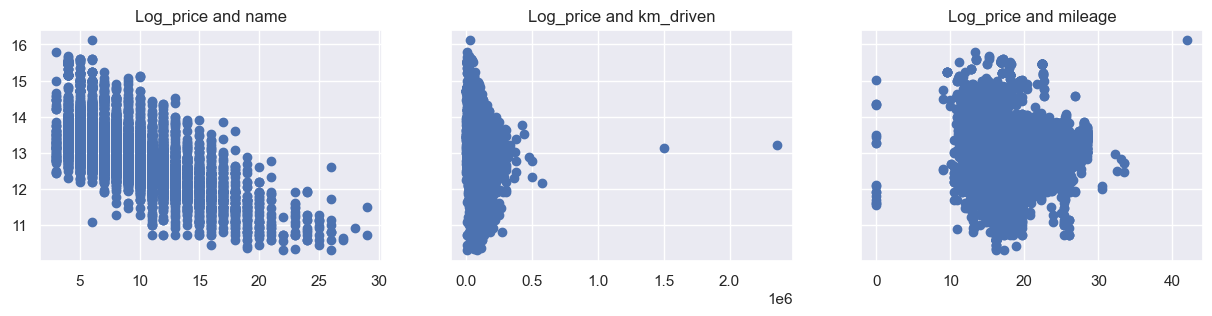

In [58]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['age'], data_cleaned['Log_price'])
ax1.set_title('Log_price and name')
ax2.scatter(data_cleaned['km_driven'], data_cleaned['Log_price'])
ax2.set_title('Log_price and km_driven')
ax3.scatter(data_cleaned['mileage'], data_cleaned['Log_price'])
ax3.set_title('Log_price and mileage')
plt.show()

In [59]:
targets = data_cleaned['Log_price']
inputs = data_cleaned.drop('Log_price', axis=1)

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(inputs)
print(scaled)

[[ 1.34377674 -0.3894082   0.98615741 ... -0.02515614 -0.26259511
   5.14194309]
 [ 0.89474378 -0.3894082   0.42619816 ... -0.02515614 -0.26259511
  -0.60730484]
 [ 1.24692649 -0.3894082  -0.42612921 ... -0.02515614  3.80814401
  -0.42478904]
 ...
 [ 0.89474378 -0.3894082  -0.02969788 ... -0.02515614 -0.26259511
  -0.10538637]
 [-0.7781241  -0.3894082   1.02827824 ... -0.02515614 -0.26259511
  -0.10538637]
 [-0.7781241  -0.3894082   1.02827824 ... -0.02515614 -0.26259511
  -0.10538637]]


In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365)

In [62]:
x_train

,km_driven,transmission,mileage,age,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,name_freq_encoded
492,146000,0,13.93,14,1,0,0,1,0,0,1,0,0,0.000506
2239,80000,0,32.52,10,0,0,0,1,0,0,1,0,0,0.000126
2348,90000,0,13.90,17,0,0,1,1,0,0,0,0,1,0.000506
2044,40000,0,16.00,5,1,0,0,1,0,0,0,0,0,0.000379
3378,120000,0,20.54,12,1,0,0,1,0,0,0,0,1,0.003162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,47000,0,25.20,7,1,0,0,1,0,0,0,0,0,0.001897
4956,8500,1,16.78,4,1,0,0,0,0,0,0,0,0,0.007841
4898,30000,0,17.00,5,0,0,1,1,0,0,0,0,0,0.000126
2740,17100,1,22.48,5,1,0,0,0,0,0,0,0,0,0.000759


In [63]:
x_test

,km_driven,transmission,mileage,age,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,name_freq_encoded
68,80000,0,21.66,6,1,0,0,1,0,0,0,0,0,0.001012
3660,30000,1,11.36,7,1,0,0,1,0,0,0,0,0,0.001265
3631,80000,0,23.95,8,0,0,1,1,0,0,1,0,0,0.006324
2916,175000,0,19.70,12,0,0,1,1,0,0,1,0,0,0.005565
464,40000,0,16.60,13,1,0,0,1,0,0,0,0,0,0.000126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7636,15000,1,15.40,6,0,0,1,1,0,0,0,0,0,0.000379
1233,100000,0,15.96,10,1,0,0,1,0,0,0,0,0,0.001012
1291,50000,0,16.80,6,0,0,1,1,0,0,0,0,0,0.000126
6139,58400,0,19.30,11,1,0,0,1,0,0,1,0,0,0.004174


In [64]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [65]:
y_hat = reg.predict(x_train)

Text(0, 0.5, 'Predictions (y_hat)')

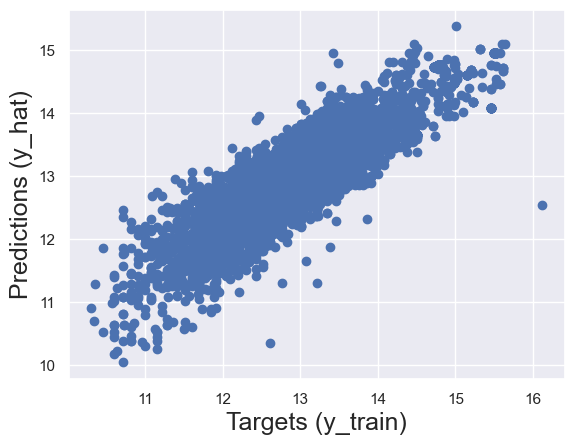

In [66]:
plt.scatter(y_train, y_hat)

plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)

C:\Users\yashv\AppData\Local\Temp\ipykernel_3780\529332098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat - y_train)


<Axes: xlabel='Log_price', ylabel='Density'>

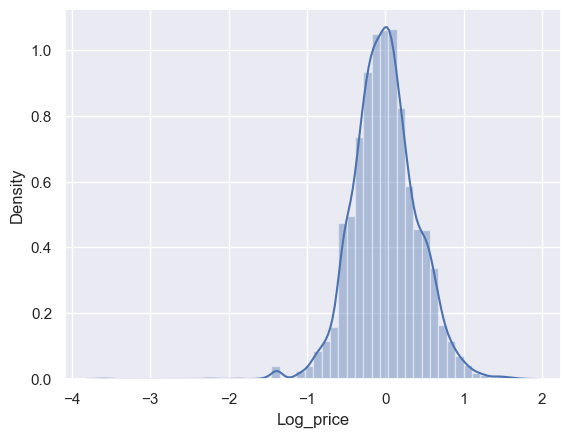

In [67]:
sns.distplot(y_hat - y_train)

In [68]:
reg.score(x_train, y_train)

0.7584088646032535

In [69]:
y_hat_test = reg.predict(x_test)

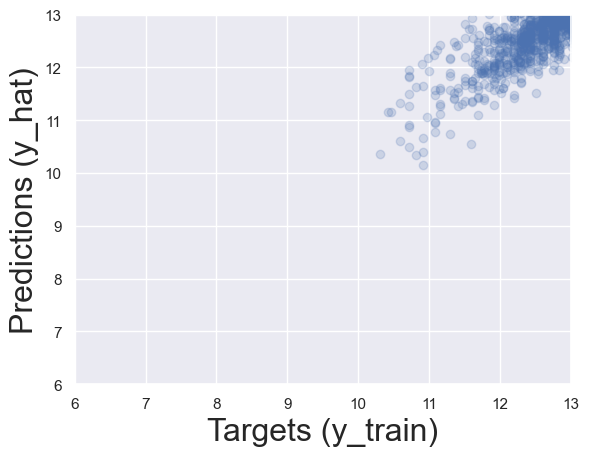

In [70]:
plt.scatter(y_test, y_hat_test, alpha = 0.2)

plt.xlabel('Targets (y_train)', size = 23)
plt.ylabel('Predictions (y_hat)', size = 23)
plt.xlim(6,13)
plt.ylim(6, 13)
plt.show()

C:\Users\yashv\AppData\Local\Temp\ipykernel_3780\2762528872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat_test - y_test)


<Axes: xlabel='Log_price', ylabel='Density'>

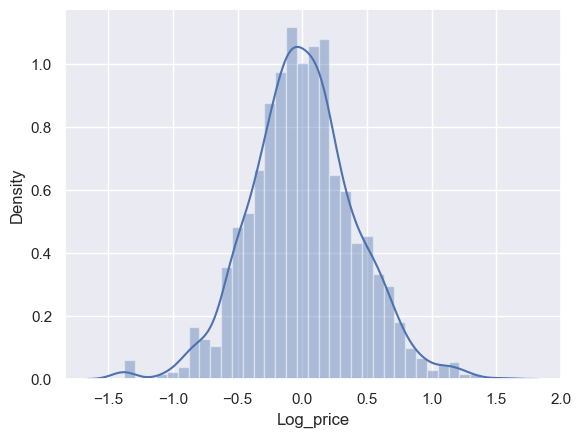

In [71]:
sns.distplot(y_hat_test - y_test)

In [72]:
r2 = reg.score(x_test, y_test)

In [73]:
r2

0.7588400348974648

In [74]:
n = inputs.shape[0]
p = inputs.shape[1]

adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

In [75]:
adj_r2

0.7584121753725078

In [76]:
train_errors = abs(y_hat - y_train)
print('Mean Absolute Error:', round(np.mean(train_errors), 2),'degrees.')

Mean Absolute Error: 0.31 degrees.


In [77]:
train_mape = 100 * (train_errors/y_train)
train_accuracy = 100 - np.mean(train_mape)
print('Accuracy:', round(train_accuracy,2),'%.')

Accuracy: 97.58 %.


In [78]:
test_errors = abs(y_hat_test - y_test)
print('Mean Absolute Error:', round(np.mean(test_errors), 2), 'degrees.')

Mean Absolute Error: 0.31 degrees.


In [79]:
test_mape = 100 * (test_errors/y_test)
test_accuracy = 100 - np.mean(test_mape)
print('Accuracy of test:', round(test_accuracy, 2),'%.')

Accuracy of test: 97.58 %.


In [80]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap from the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.show()


NameError: name 'y_pred' is not defined